# Pokémon Decision Tree Classifier

In [87]:
#Packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [88]:
processed_pokemon_data = pd.read_csv('preprocessed_pokemon.csv')
processed_pokemon_data.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,Water Absorb,Water Bubble,Water Compaction,Water Veil,Weak Armor,White Smoke,Wimp Out,Wonder Guard,Wonder Skin,Zen Mode
0,1.0,1.0,1.0,2.0,1.0,1.00,0.5,1.0,1.0,2.00,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,1.0,0.5,1.0,1.00,2.0,2.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,1.0,2.0,1.0,1.00,0.5,1.0,1.0,2.00,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,1.0,0.5,0.5,0.50,2.0,2.0,1.0,0.25,...,0,0,0,0,0,0,0,0,0,0
4,0.5,1.0,1.0,1.0,0.5,0.25,2.0,2.0,1.0,0.25,...,0,0,0,0,0,0,0,0,0,0


## Splitting Dataset

In [89]:
# Define features and target variable
X = processed_pokemon_data.drop(columns=['is_legendary'])
y = processed_pokemon_data['is_legendary']  # Target column

# (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify=y)

# Sizes
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (640, 294), Testing Set: (161, 294)


## Training

In [93]:
#Decision Tree
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

# Evaluate on test set
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Decision Tree Accuracy: {accuracy:.4f}")


Decision Tree Accuracy: 1.0000


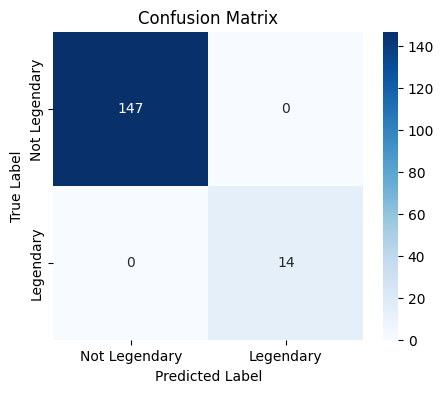

In [94]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["Not Legendary", "Legendary"], yticklabels=["Not Legendary", "Legendary"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

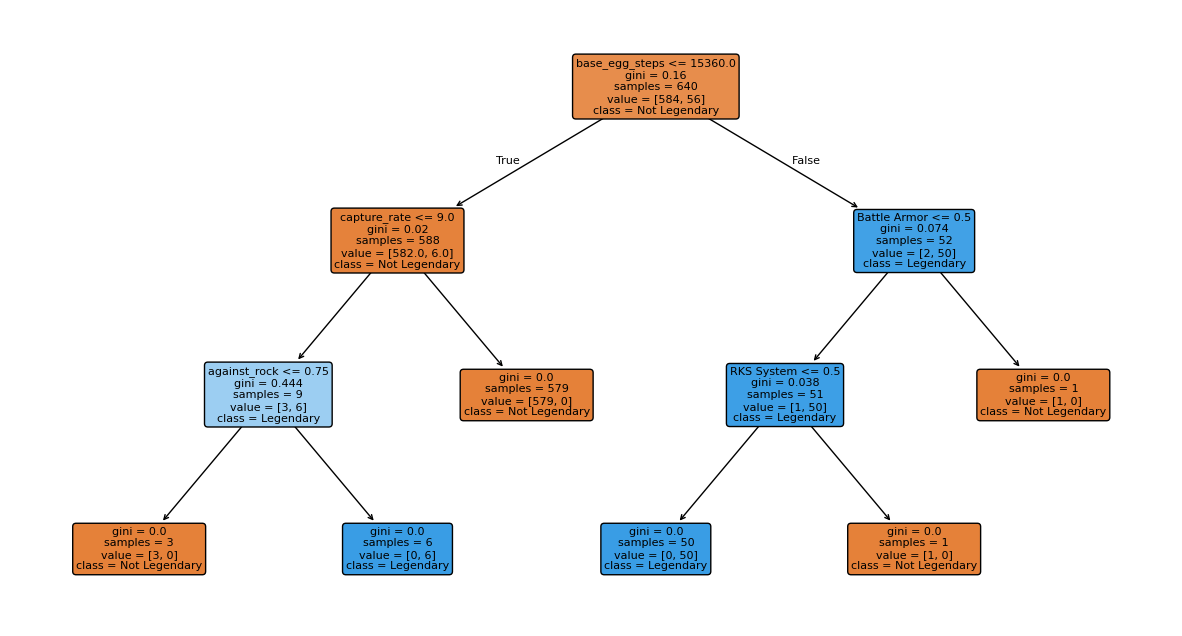

In [91]:
plt.figure(figsize=(15, 8))

plot_tree(
    tree,  
    feature_names=X.columns,  
    class_names=["Not Legendary", "Legendary"],  
    filled=True,  
    rounded=True,  
    fontsize=8
)

plt.show()